# TTP Assignment 12
### Pandas Statistical Functions, Analysis & Plotting

<h4 style="color:blue">Question #1 – Download and Prepare the Data</h4>
Download EOD price data for TECHM.NS and LT.NS for the period 1 January 2020 to 31 December 2024.<br>
Convert the data into DateTimeIndex and store the cleaned dataframes as <b>df1</b> and <b>df2</b>.<br><br>

In [1]:
import yfinance as yf
import pandas as pd

df1 = yf.download("TECHM.NS", start="2020-01-01", end="2024-12-31")
df2 = yf.download("LT.NS", start="2020-01-01", end="2024-12-31")

# Convert index to DateTimeIndex
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)

print(df1.head())
print(df2.head())


C:\Users\Swarupa\AppData\Local\Temp\5\ipykernel_8196\677689730.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download("TECHM.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\Swarupa\AppData\Local\Temp\5\ipykernel_8196\677689730.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download("LT.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker        TECHM.NS    TECHM.NS    TECHM.NS    TECHM.NS TECHM.NS
Date                                                               
2020-01-01  602.617493  606.333947  601.233710  605.701370   746371
2020-01-02  605.740784  608.192084  601.747593  602.617380  1133488
2020-01-03  612.896912  616.692467  603.763958  605.701263  2121704
2020-01-06  609.180664  615.822792  607.401515  612.699387  1734439
2020-01-07  614.478455  615.585500  601.431363  608.864271  1937143
Price             Close         High          Low         Open   Volume
Ticker            LT.NS        LT.NS        LT.NS        LT.NS    LT.NS
Date                                                                   
2020-01-01  1192.206665  1200.352272  1185.881402  1190.796052  3123998
2020-01-02  1224.379150  1226.836419  1193.162126  1194.072242  4335359
2020-01-03  1215.050659  1224.060721  1210.591068  1224.060721  2059871
2020-01-06  1198.395508 

<h4 style="color:blue">Question #2 – Perform Data Integrity Checks</h4>
Check both dataframes to confirm there are no missing values and no duplicate dates.<br>
Verify that the index is correctly set to datetime.<br><br>


In [2]:
print("TECHM missing values:\n", df1.isnull().sum())
print("LT missing values:\n", df2.isnull().sum())

print("TECHM duplicate dates:", df1.index.duplicated().sum())
print("LT duplicate dates:", df2.index.duplicated().sum())

print(type(df1.index))
print(type(df2.index))


TECHM missing values:
 Price   Ticker  
Close   TECHM.NS    0
High    TECHM.NS    0
Low     TECHM.NS    0
Open    TECHM.NS    0
Volume  TECHM.NS    0
dtype: int64
LT missing values:
 Price   Ticker
Close   LT.NS     0
High    LT.NS     0
Low     LT.NS     0
Open    LT.NS     0
Volume  LT.NS     0
dtype: int64
TECHM duplicate dates: 0
LT duplicate dates: 0
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<h4 style="color:blue">Question #3 – Compute Moving Averages</h4>
Create two new columns in each dataframe: a 100-day Simple Moving Average and a 50-day Exponential Moving Average.<br><br>

In [3]:
df1["MA100"] = df1["Close"].rolling(100).mean()
df1["EMA50"] = df1["Close"].ewm(span=50, adjust=False).mean()

df2["MA100"] = df2["Close"].rolling(100).mean()
df2["EMA50"] = df2["Close"].ewm(span=50, adjust=False).mean()


<h4 style="color:blue">Question #4 – Plot Price with Indicators</h4>
Plot the Closing Price, EMA50, and MA100 for TECHM and LT on separate charts using Matplotlib.<br>
Ensure all lines are clearly labeled.<br><br>

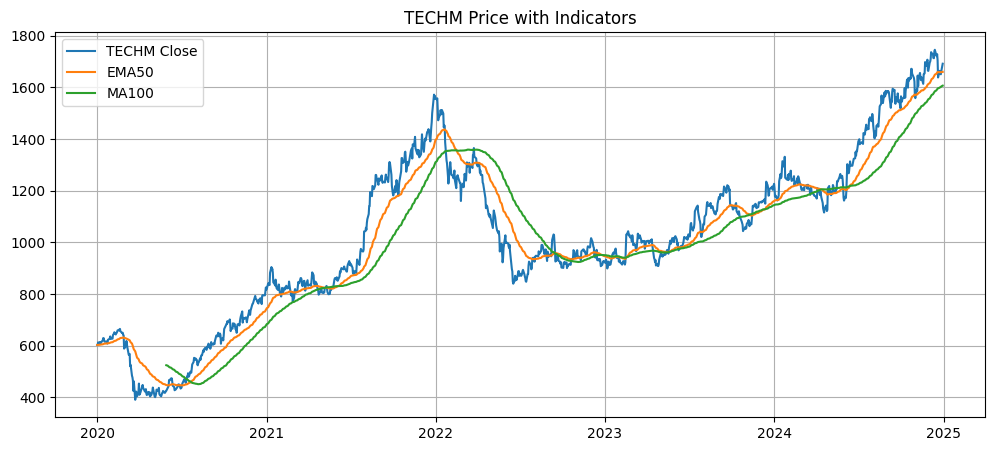

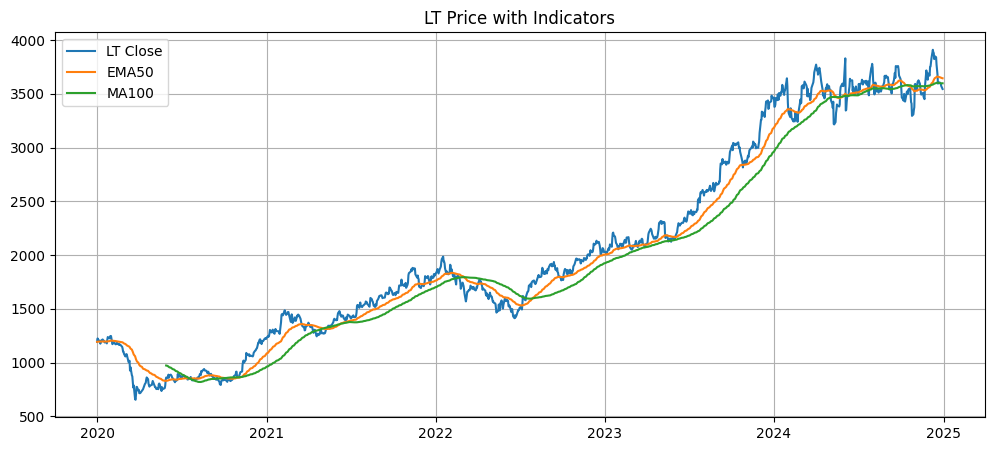

In [4]:
import matplotlib.pyplot as plt

# --- TECHM ---
plt.figure(figsize=(12,5))
plt.plot(df1["Close"], label="TECHM Close")
plt.plot(df1["EMA50"], label="EMA50")
plt.plot(df1["MA100"], label="MA100")
plt.title("TECHM Price with Indicators")
plt.legend()
plt.grid()
plt.show()

# --- LT ---
plt.figure(figsize=(12,5))
plt.plot(df2["Close"], label="LT Close")
plt.plot(df2["EMA50"], label="EMA50")
plt.plot(df2["MA100"], label="MA100")
plt.title("LT Price with Indicators")
plt.legend()
plt.grid()
plt.show()


<h4 style="color:blue">Question #5 – Calculate Daily Percentage Returns</h4>
Compute the daily percentage return for both stocks and store the results in a new column called <b>daily_pct_change</b> in each dataframe.<br><br>

In [5]:
df1["daily_pct_change"] = df1["Close"].pct_change() * 100
df2["daily_pct_change"] = df2["Close"].pct_change() * 100


<h4 style="color:blue">Question #6 – Compute Statistical Properties</h4>
Calculate the skewness, kurtosis, and standard deviation of the daily percentage returns for both stocks.<br><br>

In [6]:
print("TECHM Stats:")
print("Skewness:", df1["daily_pct_change"].skew())
print("Kurtosis:", df1["daily_pct_change"].kurtosis())
print("Std Dev:", df1["daily_pct_change"].std())

print("\nLT Stats:")
print("Skewness:", df2["daily_pct_change"].skew())
print("Kurtosis:", df2["daily_pct_change"].kurtosis())
print("Std Dev:", df2["daily_pct_change"].std())


TECHM Stats:
Skewness: -0.5900269274249226
Kurtosis: 5.345309105113753
Std Dev: 1.9575268335733786

LT Stats:
Skewness: -0.6654327553935049
Kurtosis: 9.913640214785474
Std Dev: 1.8099704172610134


<h4 style="color:blue">Question #7 – Compute Return Correlation</h4>
Calculate the correlation value between the daily percentage returns of TECHM and LT.<br>
Interpret whether the two stocks move together or independently.<br><br>

In [7]:
corr = df1["daily_pct_change"].corr(df2["daily_pct_change"])
print("Correlation between TECHM and LT returns =", corr)


Correlation between TECHM and LT returns = 0.3557299901244616


<h4 style="color:blue">Question #8 – Plot Daily Return Movements</h4>
Plot the daily percentage return series of both TECHM and LT on the same Matplotlib chart to compare volatility patterns.<br><br>

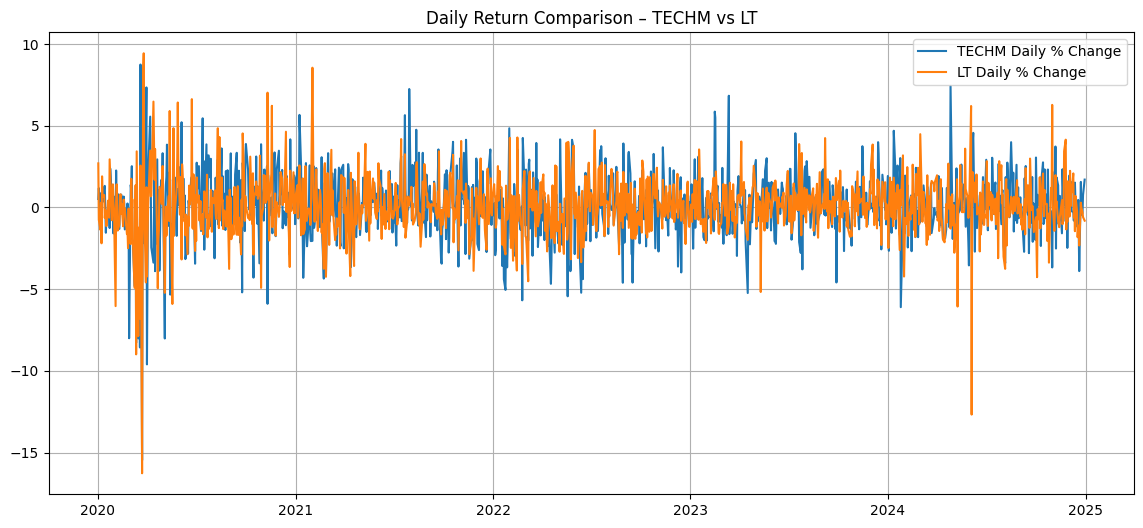

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df1["daily_pct_change"], label="TECHM Daily % Change")
plt.plot(df2["daily_pct_change"], label="LT Daily % Change")
plt.title("Daily Return Comparison – TECHM vs LT")
plt.legend()
plt.grid()
plt.show()



<h4 style="color:blue">Question #9 – Identify Relative Volatility</h4>
Using the standard deviation values obtained earlier, determine which stock demonstrates higher volatility during the selected period.<br><br>

In [9]:
std_techm = df1["daily_pct_change"].std()
std_lt = df2["daily_pct_change"].std()

print("TECHM STD:", std_techm)
print("LT STD:", std_lt)

if std_techm > std_lt:
    print("TECHM is more volatile.")
else:
    print("LT is more volatile.")


TECHM STD: 1.9575268335733786
LT STD: 1.8099704172610134
TECHM is more volatile.


<h4 style="color:blue">Question #10 – Interpret Skewness and Kurtosis</h4>
Based on the skewness and kurtosis values, describe the shape of the return distributions for TECHM and LT.<br>
Explain whether the returns are symmetric, skewed, normal, or fat-tailed.<br><br>

In [10]:
# Question 10 – Interpret Skewness and Kurtosis

# Calculate skewness and kurtosis
techm_skew = df1["daily_pct_change"].skew()
techm_kurt = df1["daily_pct_change"].kurtosis()

lt_skew = df2["daily_pct_change"].skew()
lt_kurt = df2["daily_pct_change"].kurtosis()

print("TECHM Skewness:", techm_skew)
print("TECHM Kurtosis:", techm_kurt)
print("LT Skewness:", lt_skew)
print("LT Kurtosis:", lt_kurt)

# Interpretation functions
def interpret_skewness(sk):
    if sk > 0:
        return "Right-skewed (more large positive returns)"
    elif sk < 0:
        return "Left-skewed (more large negative returns)"
    else:
        return "Symmetric distribution"

def interpret_kurtosis(ku):
    if ku > 3:
        return "Fat-tailed / leptokurtic (more extreme return events)"
    elif ku < 3:
        return "Thin-tailed / platykurtic (fewer extreme events)"
    else:
        return "Normal distribution"

# Print interpretations
print("\n--- Interpretation ---")

print("\nTECHM:")
print("Skewness Interpretation:", interpret_skewness(techm_skew))
print("Kurtosis Interpretation:", interpret_kurtosis(techm_kurt))

print("\nLT:")
print("Skewness Interpretation:", interpret_skewness(lt_skew))
print("Kurtosis Interpretation:", interpret_kurtosis(lt_kurt))


TECHM Skewness: -0.5900269274249226
TECHM Kurtosis: 5.345309105113753
LT Skewness: -0.6654327553935049
LT Kurtosis: 9.913640214785474

--- Interpretation ---

TECHM:
Skewness Interpretation: Left-skewed (more large negative returns)
Kurtosis Interpretation: Fat-tailed / leptokurtic (more extreme return events)

LT:
Skewness Interpretation: Left-skewed (more large negative returns)
Kurtosis Interpretation: Fat-tailed / leptokurtic (more extreme return events)
